# Pi Day Fun
March 14, 2016


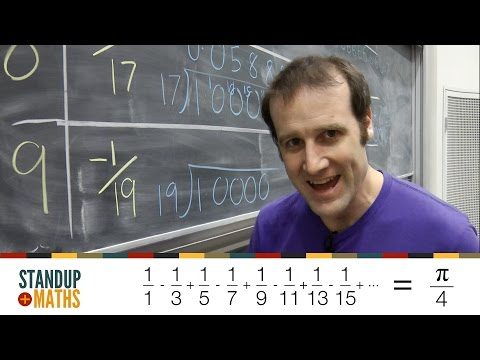

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("HrRMnzANHHs")

Reference Pi:  
<pre>
3.14159265358979323846264338327950288419716939937510
  58209749445923078164062862089986280348253421170679
  82148086513282306647093844609550582231725359408128
  48111745028410270193852110555964462294895493038196
  44288109756659334461284756482337867831652712019091
  45648566923460348610454326648213393607260249141273
  72458700660631558817488152092096282925409171536436
  78925903600113305305488204665213841469519415116094
  33057270365759591953092186117381932611793105118548
  07446237996274956735188575272489122793818301194912
  98336733624406566430860213949463952247371907021798
  60943702770539217176293176752384674818467669405132
  00056812714526356082778577134275778960917363717872
  14684409012249534301465495853710507922796892589235
  42019956112129021960864034418159813629774771309960
  51870721134999999837297804995105973173281609631859
  50244594553469083026425223082533446850352619311881
  71010003137838752886587533208381420617177669147303
  59825349042875546873115956286388235378759375195778
  18577805321712268066130019278766111959092164201989
</pre>

The sequence of odd fractions, as a running total, converges to pi/4, albeit slowly...


In [2]:
from fractions import Fraction
from itertools import count, islice
from decimal import Decimal, localcontext

def convert(f):
    """get a Decimal from a Fraction (and multiply by 4)"""
    return (Decimal(f.numerator) / Decimal(f.denominator)) * Decimal(4)

def pi_series():
    "...converges very slowly"
    denoms = count(1,2)  # odd numbers from 1
    total = Fraction(1,next(denoms)) # 1/1
    while True:
        yield total
        total -= Fraction(1, next(denoms))  # - 1/3
        total += Fraction(1, next(denoms))  # + 1/5 and so on

def nth(iterable, n, default=None):
    "Returns the nth item or a default value"
    return next(islice(iterable, n, None), default)

with localcontext() as ctx:  # <-- context manager object
    ctx.prec = 3000
    pi = pi_series()
    print("{0}".format(convert(nth(pi, 1000)))[:10])

3.14209240


The Youtube above describes how to use successive primes in successive terms to build a running product that converges to 2/pi.

In [3]:
def Primes():
    """generate successive prime numbers (trial by division)"""
    candidate = 1
    _primes_so_far = [2]  # first prime, only even prime
    yield _primes_so_far[-1]
    while True:
        candidate += 2           # check odds only from now on
        for prev in _primes_so_far:
            if prev**2 > candidate:
                yield candidate
                _primes_so_far.append(candidate)
                break
            if not divmod(candidate, prev)[1]: # no remainder!
                break                          # done looping


p = Primes()
print([next(p) for _ in range(100)])  # next 30 primes please!  

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


In [4]:
def convert(f):
    """get a Decimal from a Fraction (and multiply by 4)"""
    return (Decimal(f.denominator) / Decimal(f.numerator))

def Pi():
    primes = Primes()
    result = Fraction(1,1)
    while True:
        p = next(primes)
        if divmod(p, 4)[1] == 1:
            term = (1 + Fraction(1,p))
        else:
            term = (1 - Fraction(1,p))
        result *= term
        yield result
        

with localcontext() as ctx:  # <-- context manager object
    ctx.prec = 300  # feel free to boost
    pi = Pi()
    print("{0}".format(convert(nth(pi, 333)))[:10])
    # print("{0}".format(convert(nth(pi, 3000)))[:20])

3.13702930


[Ramanujan](http://mathforum.org/kb/thread.jspa?threadID=2246748&tstart=0)<br />
[Pi Contest](http://mathforum.org/kb/thread.jspa?threadID=2246748&tstart=0)

Below is a famous one from Ramanujan.  Why it works I'm not sure anyone knows exactly.

Thanks to [a change in Python 3.8](https://bugs.python.org/issue33083), factorial no longer accepts the Decimal type.  I've had to update the code for forward compatibility.

Here's [a corresponding script](https://repl.it/@kurner/computepi) on repl.it.

In [5]:
from math import factorial as fact
def pieinsky():
    """Ramanujan's: converges relatively quickly"""
    c1 = Decimal(4)
    c2 = Decimal(1103)
    c3 = Decimal(26390)
    c4 = Decimal(396)
    c5 = Decimal(9801)
    # code formatted for readability (make it be one line)
    root8 = Decimal('8').sqrt()
    i = Decimal(0)
    thesum = Decimal(0)
    
    while True:
        # explicit casts to int create forward compatibility
        term = (fact(int(c1*i))*(c2 + c3*i))/(pow(fact(int(i)),4)*pow(c4,4*i))
        thesum = thesum + term
        yield 1/((root8/c5)*thesum)
        i += 1

with localcontext() as ctx:  # <-- context manager object
    ctx.prec = 1000
    pi = pieinsky()
    print("{0}".format(nth(pi, 100))[:100])

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706


The generator below gives successive digits of Pi.

In [6]:
"""
Another generator example:  converging to Pi

https://mail.python.org/pipermail/edu-sig/2015-September/date.html

"""

def pi():

    k, a, b, a1, b1 = 2, 4, 1, 12, 4
    while True:
        p, q, k = k*k, 2*k+1, k+1
        a, b, a1, b1 = a1, b1, p*a+q*a1, p*b+q*b1
        d, d1 = a/b, a1/b1
        while d == d1:
            yield int(d)
            a, a1 = 10*(a%b), 10*(a1%b1)
            d, d1 = a/b, a1/b1

if __name__ == "__main__":                    
    the_gen = pi()
    for _ in range(100):
        print(next(the_gen),end="")
    print()


3141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067


![pi day](http://imgs.xkcd.com/comics/doomsday_clock.png)
<div align="center">xkcd 1655</div>

This I-Python Notebook is by Kirby Urner, copyleft MIT License, March 2016.